In [53]:
import math
import pandas as pd #package for reading data
import numpy as np
import graphlib
import statistics
import matplotlib.pyplot as plt #package for plots
import gmplot 
from scipy import signal
from scipy import integrate

def speedfn (x,y):
  i = 0
  time = y
  #value = reduce_bar
  value = x
  speed = []
  times = []
  while i <len(x)-1:
    x0, x1 = time.iat[i], time.iat[i+1] #time
    t = time.iat[i]
    y0, y1 = value[i], value[i+1] # acc
    # val = y1-y0
    val = (x1-x0)*(y0)
    if val < 0 :  # somehow abs() doesn't work
     val *= -1 
    # speed.append((x1-x0)*(val))
    speed.append(val)
    times.append(y0)
    i = i + 1
  speed.append(0)
  times.append(0)
  return speed

#main function
def der(x,y):
  """
  derivative of column y of sheet x
  """
  i = 0
  time = x['time']
  #value = reduce_bar
  value = x[y]
  slopes = []
  aslopes = []
  times = []

  while i < len(x)-1: 
    x0, x1 = time.iat[i], time.iat[i+1]
    t = time.iat[i]
    y0, y1 = value[i], value[i+1]
    numerator = y1-y0
    num = numerator
    if numerator < 0 :  # somehow abs() doesn't work
      numerator *= -1
    slope = numerator#/(x1-x0)
    #slope = numerator
    aslope = num# /(x1-x0)
    #aslope = num
    slopes.append(slope)
    times.append(t)
    aslopes.append(aslope)
    i+=1
  slopes.append(0)
  times.append(0)
  aslopes.append(0)
  return [slopes,times,aslopes]

def complicated(x,y):
  #x: vel , y: rounded time
  # return: mean of vel for same rounded time , corresponding time
  a = []
  b = []
  c = []
  d = []
  count = 0
  counts = []
  n = 0
  while n < max(y) :
    for i in y:
      if i == n:
        a.append(x[y.index(i)])
        c.append(i)
        count = count + 1 
    n = n + 1
    counts.append(count)
    if(len(a) == 0):
      b.append(0)
      d.append(0)
    else:
      b.append(sum(a)/len(a))
      d.append(sum(c)/len(c))
    count = 0
    a.clear()
    c.clear()
  return [b,d]

#sunny // home-station
gps_data = pd.read_csv('final/GPS.csv')
pressure_data = pd.read_csv('final/Pressure.csv')
acceleration_data = pd.read_csv("final/Acceleration.csv")

#rainy // station-home
gps_data1 = pd.read_csv('GPS.csv')
pressure_data1 = pd.read_csv('Pressure.csv')
acceleration_data1 = pd.read_csv("Acceleration.csv")

latitude1 = gps_data1["Latitude"]
longitude1 = gps_data1["Longitude"]
gps_time1 = gps_data1["time"]
gps_speed1 = gps_data1["Speed"]
altitude1 = gps_data1["Altitude"]

latitude = gps_data["Latitude"]
longitude = gps_data["Longitude"]
gps_time = gps_data["time"]
gps_speed = gps_data["Speed"]
altitude = gps_data["Altitude"]

bar = pressure_data["Pressure"] #pressure
bar_time = pressure_data["time"] # pressure time 

bar1 = pressure_data1["Pressure"] #pressure
bar_time1 = pressure_data1["time"] # pressure time 

aa = acceleration_data["abs Acceleration"]
at = acceleration_data["time"]

aa1 = acceleration_data1["abs Acceleration"]
at1 = acceleration_data1["time"]

deri_a = speedfn(aa,at)
deri_a1 = speedfn(aa1,at1)

deri = der(pressure_data,'Pressure')
der_p = deri[0] #deri func absolute slope
der_t = deri[1] # deri func time 
der_a = deri[2] #deri func slope

deri1 = der(pressure_data1,'Pressure')
der_p1 = deri1[0] #deri func absolute slope
der_t1 = deri1[1] # deri func time 
der_a1 = deri1[2] #deri func slope

new_der_t = []
for i in der_t:
  new_der_t.append(math.floor(i))
  
new_at = []
for i in at: #at
  new_at.append(math.floor(i))

new_gps_time = []
for i in gps_time:
  new_gps_time.append(math.floor(i))

new_bar_time = []
for i in bar_time:
  new_bar_time.append(math.floor(i))

ass = complicated(deri_a,new_at)
ass_p = complicated(der_p,new_der_t)
ass_a = complicated(der_a,new_der_t)
ass_b = complicated(bar,new_bar_time)
ass_aa = complicated(aa,new_at)

new_der_t1 = []
for i in der_t1:
  new_der_t1.append(math.floor(i))
  
new_at1 = []
for i in at1: #at
  new_at1.append(math.floor(i))

new_gps_time1 = []
for i in gps_time1:
  new_gps_time1.append(math.floor(i))

new_bar_time1 = []
for i in bar_time1:
  new_bar_time1.append(math.floor(i))

ass1 = complicated(deri_a1,new_at1)
ass_p1 = complicated(der_p1,new_der_t1)
ass_a1 = complicated(der_a1,new_der_t1)
ass_b1 = complicated(bar1,new_bar_time1)
ass_aa1 = complicated(aa1,new_at1)


297
266
2.2610112860486336
2.1017307572107224
2.009457353476026
1.9873853104581867
1.892060857617953
1.7058574546496412


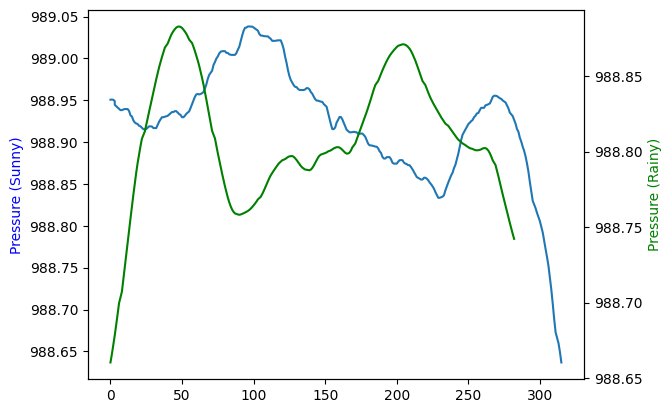

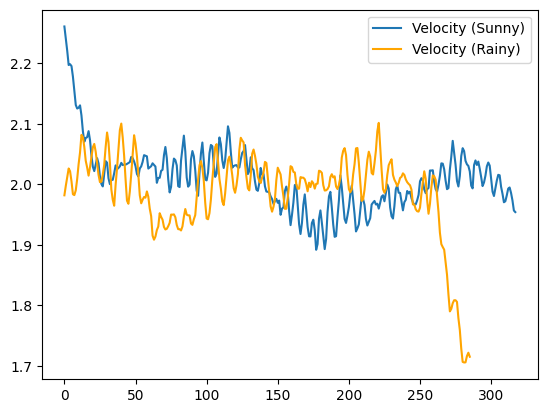

In [54]:
fig, ax = plt.subplots()
fig.set_dpi(100)
reduce_bar1 = signal.savgol_filter(bar1,window_length=20, polyorder=1, mode="nearest")
ax.plot(new_bar_time,bar,label='Pressure')
ax.set_ylabel('Pressure (Sunny)',color='blue')
ax1 = ax.twinx()
ax1.plot(new_bar_time1,reduce_bar1,label='Pressure Reverse',color='green')
ax1.set_ylabel('Pressure (Rainy)',color='green')
# ax.plot(at,aa,label='Abs Acc')
plt.plot

# reduce_p = signal.savgol_filter(der_p,window_length=15, polyorder=1, mode="nearest")
# reduce_p1 = signal.savgol_filter(der_p1,window_length=15, polyorder=1, mode="nearest")
# fig1,ax2 = plt.subplots()
# fig1.set_dpi(100)
# ax2.plot(der_t,reduce_p)
# ax3 = ax2.twinx()
# ax3.plot(der_t1,reduce_p1,color='green')
print(len(new_bar_time))
print(len(new_bar_time1))


reduce_ass = signal.savgol_filter(ass[0],window_length=50, polyorder=1, mode="nearest")
reduce_ass1 = signal.savgol_filter(ass1[0],window_length=50, polyorder=1, mode="nearest")
fig1,ax2 = plt.subplots()
fig.set_dpi(100)
ax2.plot(ass[1],reduce_ass,label='Velocity (Home-Station)')
ax2.plot(ass1[1],reduce_ass1,label='Velocity (Station-Home)',color='orange')
ax2.legend()

# reduce_ass = signal.savgol_filter(ass_aa[0],window_length=20, polyorder=1, mode="nearest")
# reduce_ass1 = signal.savgol_filter(ass_aa1[0],window_length=20, polyorder=1, mode="nearest")
# fig1,ax2 = plt.subplots()
# fig.set_dpi(100)
# ax2.plot(ass_aa[1],reduce_ass,label='Abs Acceleration (Running)')
# ax2.plot(ass_aa1[1],reduce_ass1,label='Abs Acceleration (Walking)',color='orange')
# ax2.legend()

print(max(reduce_ass))
print(max(reduce_ass1))

print(statistics.mean(reduce_ass))
print(statistics.mean(reduce_ass1))

print(min(reduce_ass))
print(min(reduce_ass1))
